In [204]:
import matplotlib.pyplot as plt
from tueplots import figsizes, fontsizes, fonts, bundles, cycler
from tueplots.constants.color import palettes
import os
import sys
from pathlib import Path
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
# Add the parent directory of `utils.py` to the Python path
sys.path.append(str(Path('../code').resolve()))

from utils import load_model_and_metrics, load_file

In case of confusion: I use tueplots to generate plots with font sizes that match the column or width of a paper. It's a nice package done by one of my professors at home. 

Variables to make all the figures uniform

In [99]:
marker_size = 0.5
line_width = 0.5

In [ ]:
experiment = "1"
exp_dir = os.path.join('../results', 'MNIST', f'exp{experiment}')
models_dir = os.path.join(exp_dir, 'models')
metrics_dir = os.path.join(exp_dir, 'metrics')

In [124]:
datasets = load_file(os.path.join(exp_dir, 'datasets.pkl'))

In [125]:
models_list = {}
for file in os.listdir(models_dir):
    query_method = file[:-10] # remove "_model.pkl" to retrieve the query method
    model, metrics = load_model_and_metrics("1", query_method)
    models_list[query_method] = (model, metrics)

In [126]:
train_losses = {}
test_losses = {}
test_accuracies = {}
for query_method, (_, metrics) in models_list.items():
    train_losses[query_method] = metrics['train_loss']
    test_losses[query_method] = metrics['test_loss']
    test_accuracies[query_method] = metrics['test_acc']

train_losses_initial, test_losses_initial, test_accuracies_initial = train_losses.pop('initial_active_model'), test_losses.pop('initial_active_model'), test_accuracies.pop('initial_active_model')
train_losses_whole_dataset, test_losses_whole_dataset, test_accuracies_whole_dataset = train_losses.pop('whole_dataset'), test_losses.pop('whole_dataset'), test_accuracies.pop('whole_dataset')


## Helper methods

In [84]:
def duplicate_points(data, factor):
    return [value for value in data for _ in range(factor)]

def align_data_lengths(data, factor):
    x_original = np.linspace(0, 1, len(data))
    x_target = np.linspace(0, 1, len(data) * factor)
    interpolator = interp1d(x_original, data, kind="linear")
    return interpolator(x_target)

---

# Plots

---

## Train loss and Test Loss

In [59]:
# for query_method, _train_losses in train_losses.items():
#     print(query_method, len(_train_losses))

In [112]:
def plot_losses(interpolation_method, data:dict, x_ax_label:str, y_ax_label:str, title:str, whole_dataset_baseline:list):
    plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1))
    plt.rcParams.update({"figure.dpi": 150})
    plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))

    plt.tight_layout()
    
    max_iterations = max([len(l) for i, l in data.items()]) # The stream based experiments have 500 points, pool based just 100 (as 5 points were added at once each time)
    
    for method, d in data.items():
            num_queries = len(d)
            method_losses = d  
            if num_queries < max_iterations:
                factor = int(max_iterations/num_queries)
                method_losses = interpolation_method(method_losses, factor)
            plt.plot(range(1, max_iterations + 1), 
                     method_losses, 
                     label=method, marker='o', markersize=marker_size, linewidth=line_width)
    
    plt.axhline(y=whole_dataset_baseline[-1], color='black', linestyle='-', label='whole_dataset', linewidth=line_width)
    
    # Add labels, legend, and title
    plt.xlabel(x_ax_label)
    plt.ylabel(y_ax_label)
    plt.title(title)
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    
    plt.grid(alpha=0.3)
    plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_10652\1733801476.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


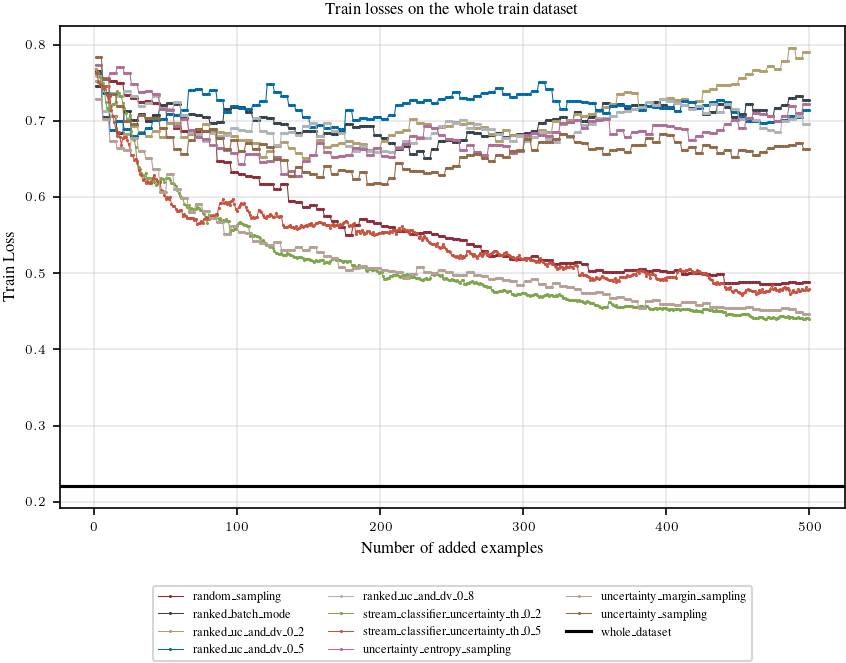

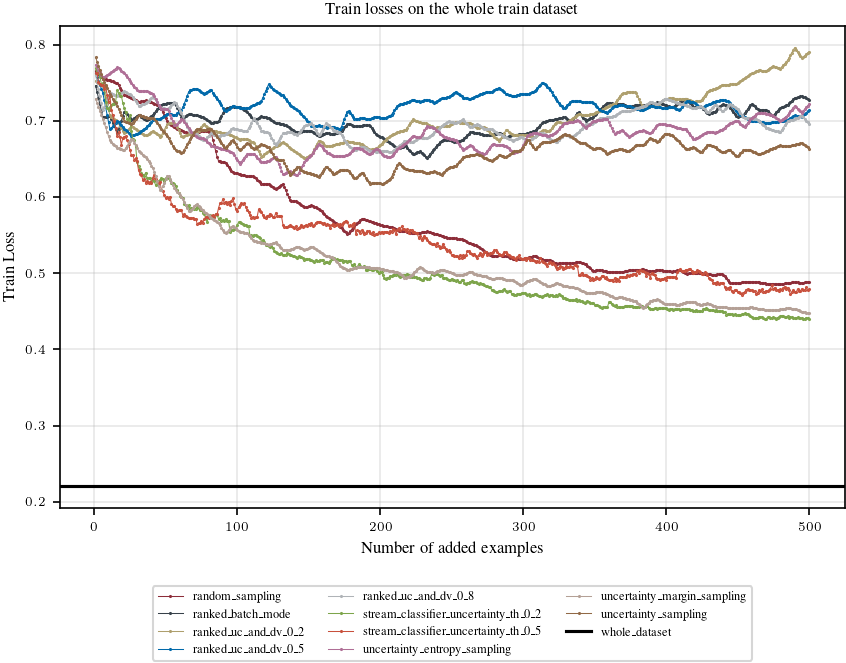

In [113]:
plot_losses(interpolation_method=duplicate_points, data=train_losses, x_ax_label="Number of added examples", y_ax_label="Train Loss", title="Train losses on the whole train dataset", whole_dataset_baseline=train_losses_whole_dataset)
plot_losses(interpolation_method=align_data_lengths, data=train_losses, x_ax_label="Number of added examples", y_ax_label="Train Loss", title="Train losses on the whole train dataset", whole_dataset_baseline=train_losses_whole_dataset)

C:\Users\lukas\AppData\Local\Temp\ipykernel_10652\1733801476.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


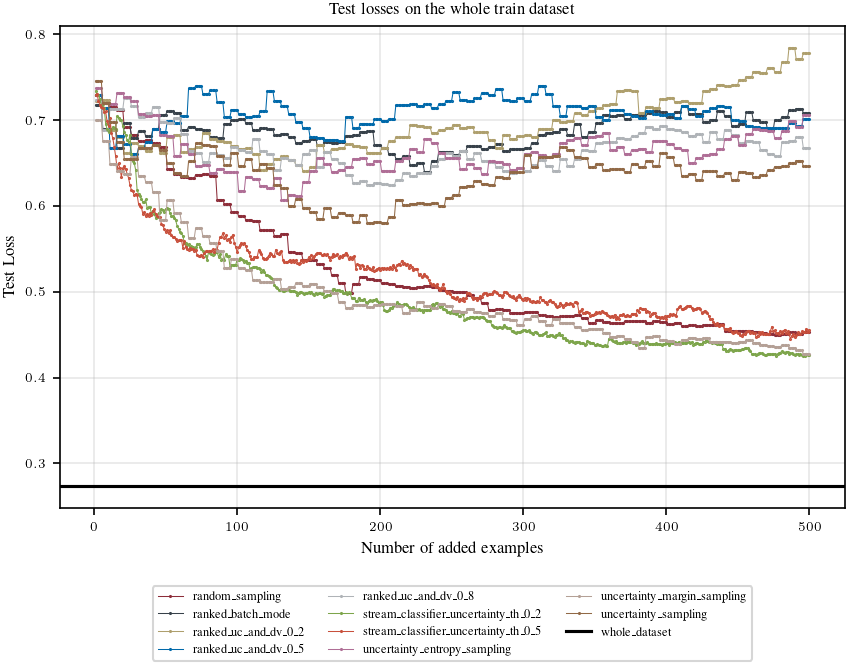

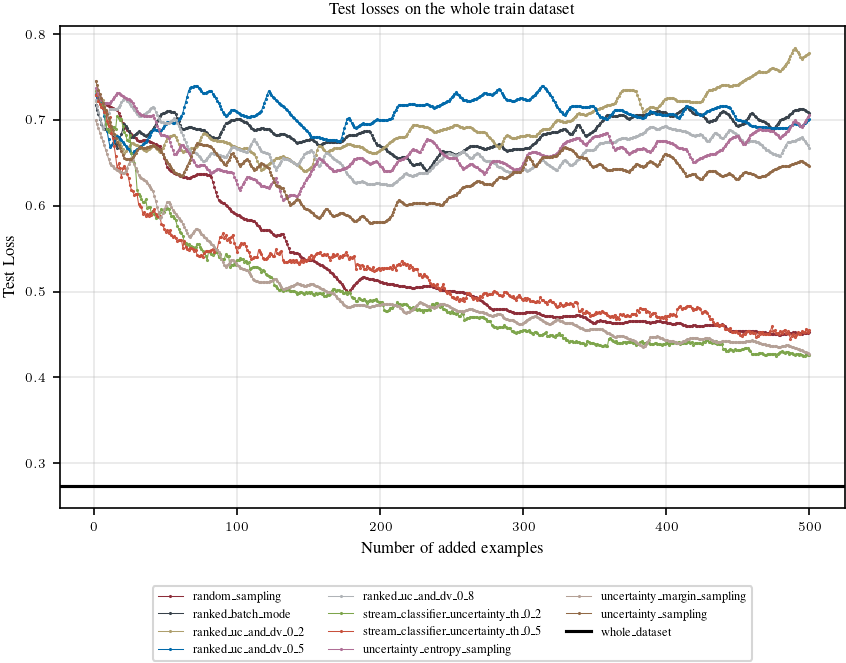

In [114]:
plot_losses(interpolation_method=duplicate_points, data=test_losses, x_ax_label="Number of added examples", y_ax_label="Test Loss", title="Test losses on the whole train dataset", whole_dataset_baseline=test_losses_whole_dataset)
plot_losses(interpolation_method=align_data_lengths, data=test_losses, x_ax_label="Number of added examples", y_ax_label="Test Loss", title="Test losses on the whole train dataset", whole_dataset_baseline=test_losses_whole_dataset)

# Test Accuracy

In [118]:
def plot_accuracies(interpolation_method, data:dict, x_ax_label:str, y_ax_label:str, title:str, whole_dataset_baseline:list, _markevery=5):
    plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1))
    plt.rcParams.update({"figure.dpi": 150})
    plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))

    plt.tight_layout()
    
    max_iterations = max([len(l) for _, l in data.items()]) # The stream based experiments have 500 points, pool based just 100 (as 5 points were added at once each time)
    
    for method, d in data.items():
        num_queries = len(d)
        method_accuracies = d  
        if num_queries < max_iterations:
            factor = int(max_iterations/num_queries)
            method_accuracies = interpolation_method(method_accuracies, factor)
        plt.plot(range(1, max_iterations + 1), 
                 method_accuracies, 
                 label=method, marker='o', markersize=marker_size, linewidth=line_width, markevery=_markevery)
    
    plt.axhline(y=whole_dataset_baseline[-1], color='black', linestyle='-', label='whole_dataset', linewidth=line_width)
    
    # Add labels, legend, and title
    plt.xlabel(x_ax_label)
    plt.ylabel(y_ax_label)
    plt.title(title)
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    
    plt.grid(alpha=0.3)
    plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_10652\1376955159.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


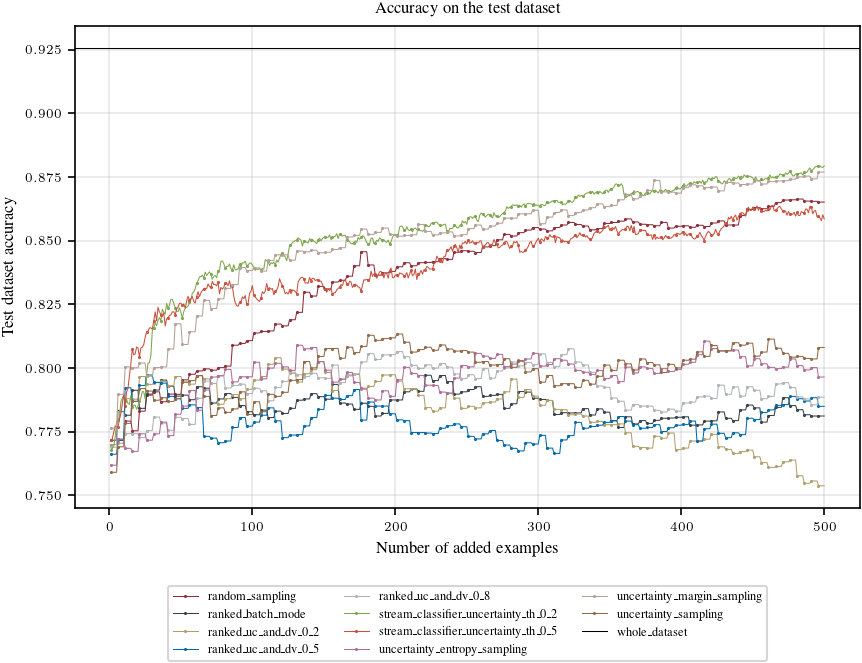

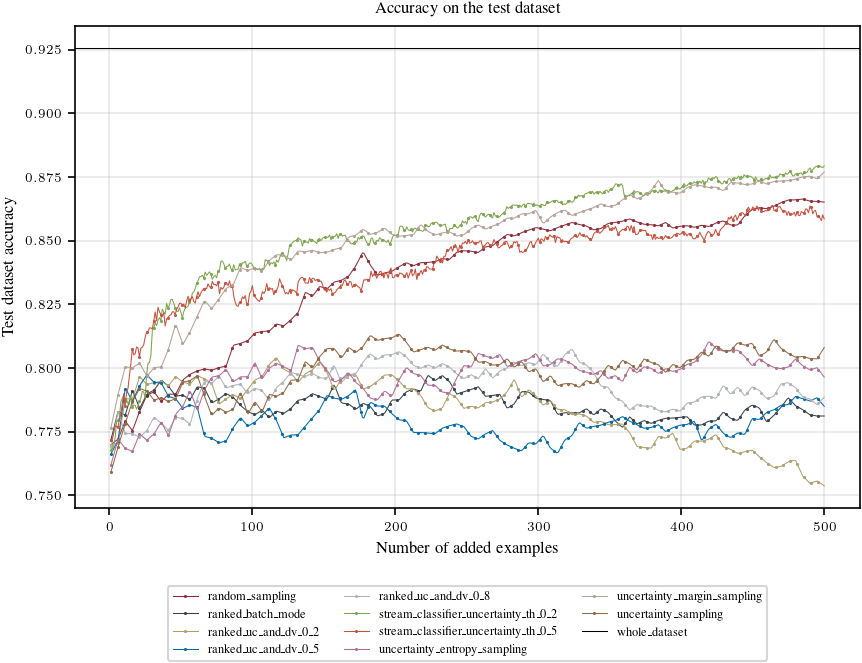

In [119]:
plot_accuracies(interpolation_method=duplicate_points, data=test_accuracies, x_ax_label="Number of added examples", y_ax_label="Test dataset accuracy", title="Accuracy on the test dataset", whole_dataset_baseline=test_accuracies_whole_dataset)
plot_accuracies(interpolation_method=align_data_lengths, data=test_accuracies, x_ax_label="Number of added examples", y_ax_label="Test dataset accuracy", title="Accuracy on the test dataset", whole_dataset_baseline=test_accuracies_whole_dataset)

# ROC Curve (One-vs-Rest)

Due to the fact that a ROC curve is more for a binary task as it plots the TPR vs FPR, and we have multiple classes, I opt out to use the One vs Rest approach. (Another option would be One vs One, where each class is compared to each other class but due to the fact that there are 10 classes in MNIST, this approach is not taken)

In [155]:
line_width = 1

In [163]:
X_test, y_test = datasets['X_test'], datasets['y_test']
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

y_hats_probs = {}
y_hats_classes = {}
for query_method, (model, _) in models_list.items():
    y_hats_probs[query_method] = model.predict_proba(X_test)
    y_hats_classes[query_method] = model.predict(X_test)

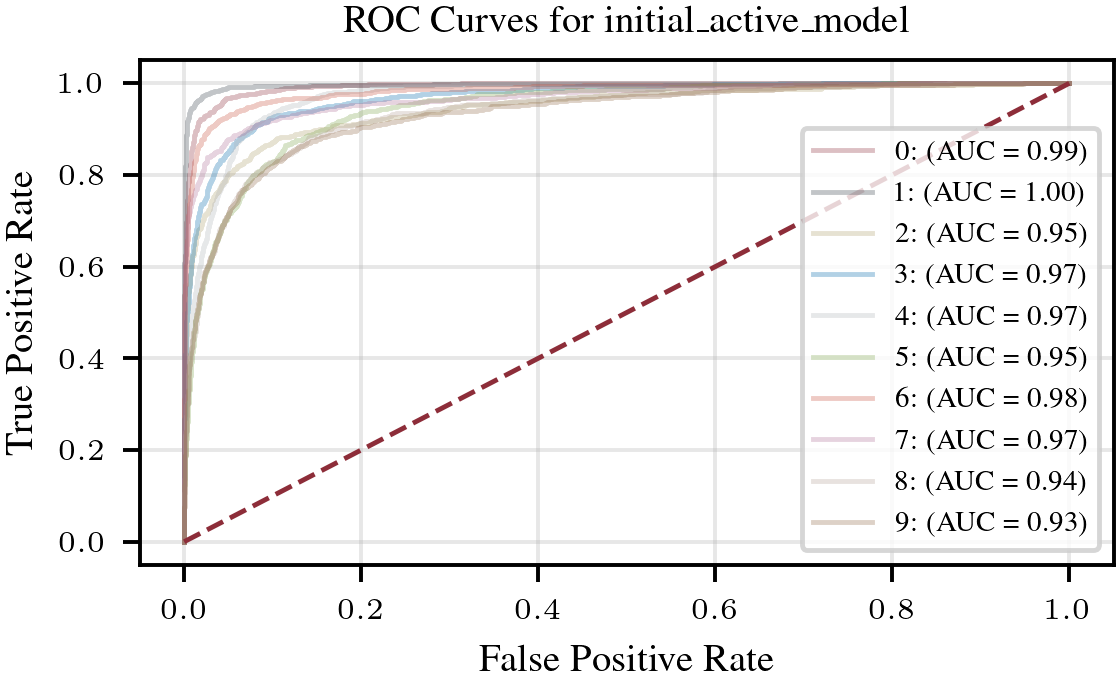

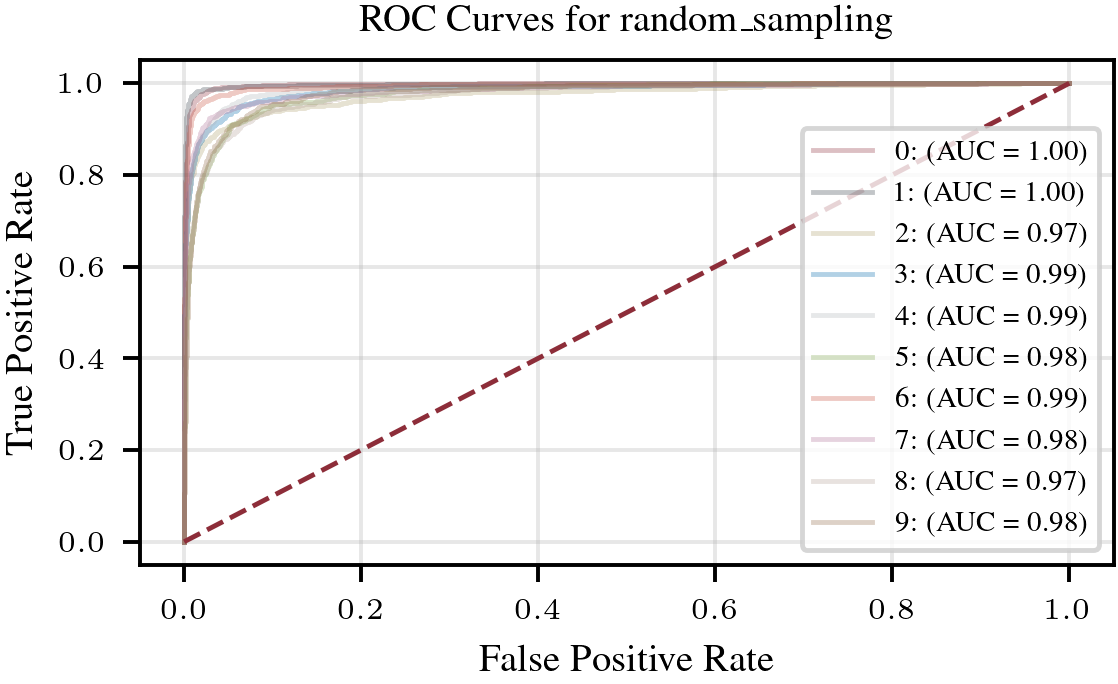

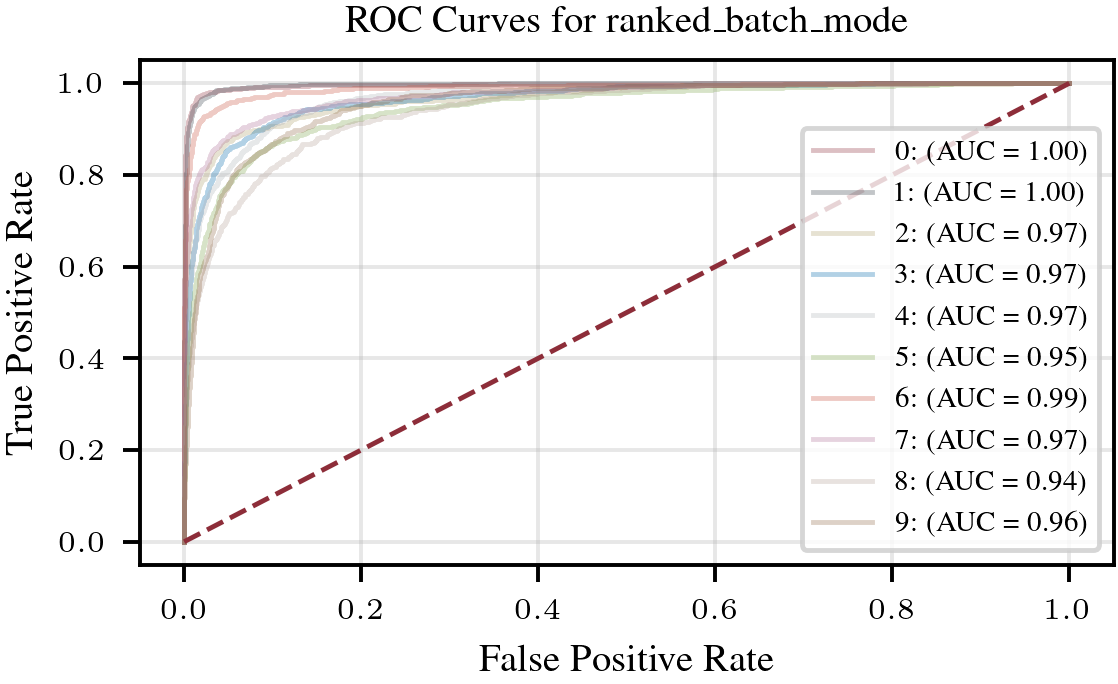

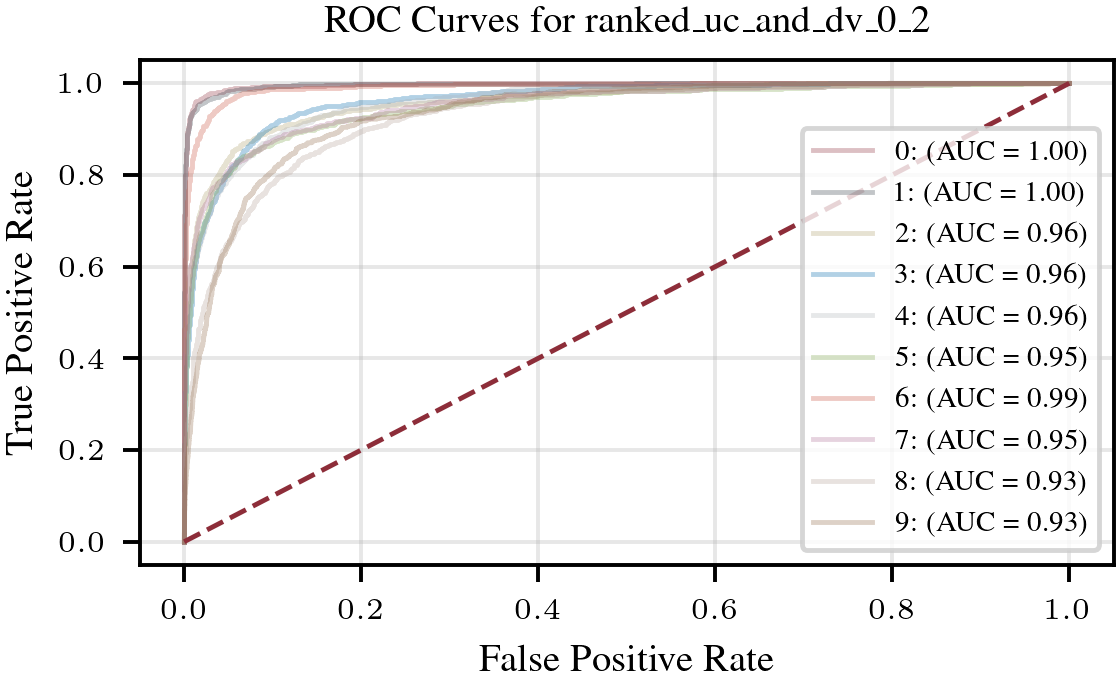

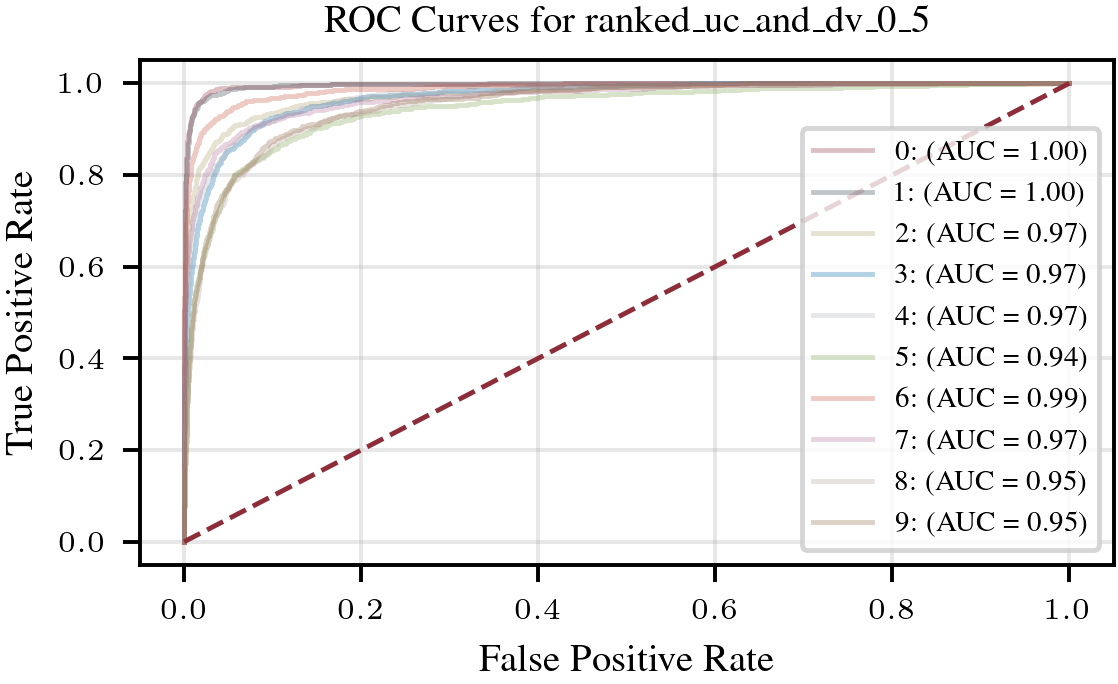

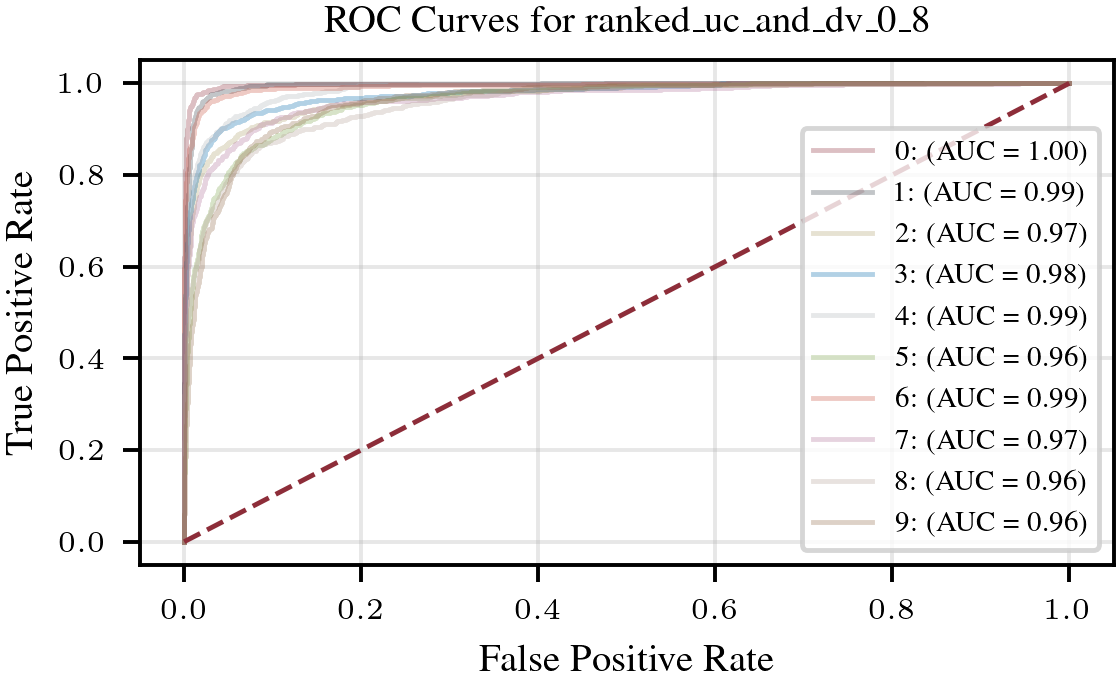

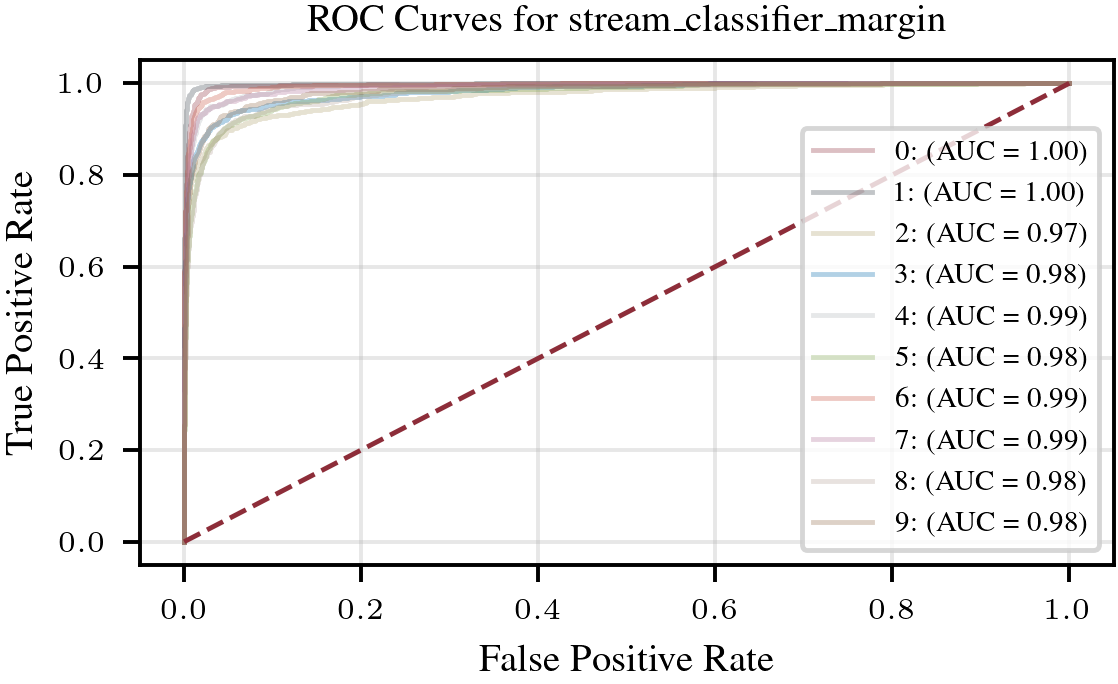

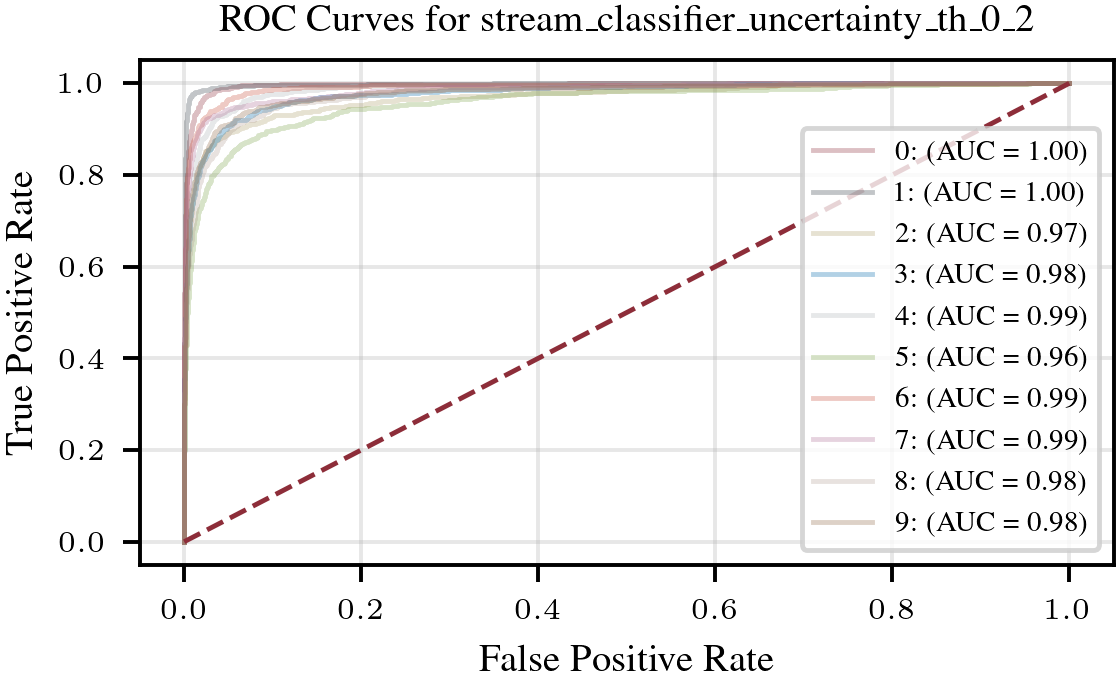

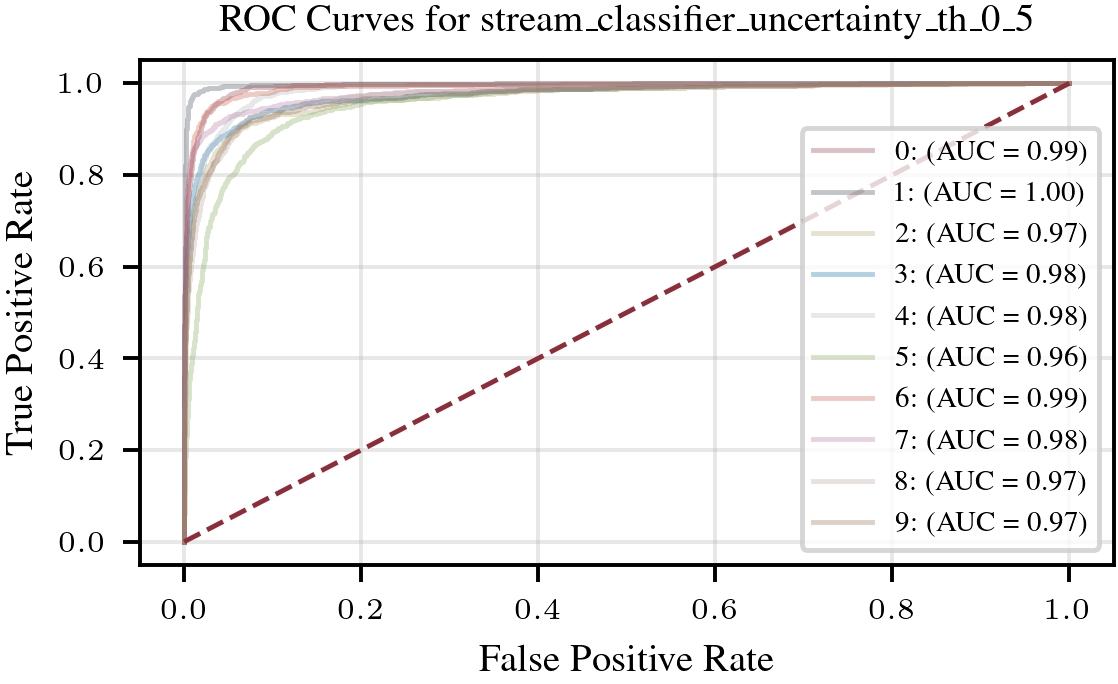

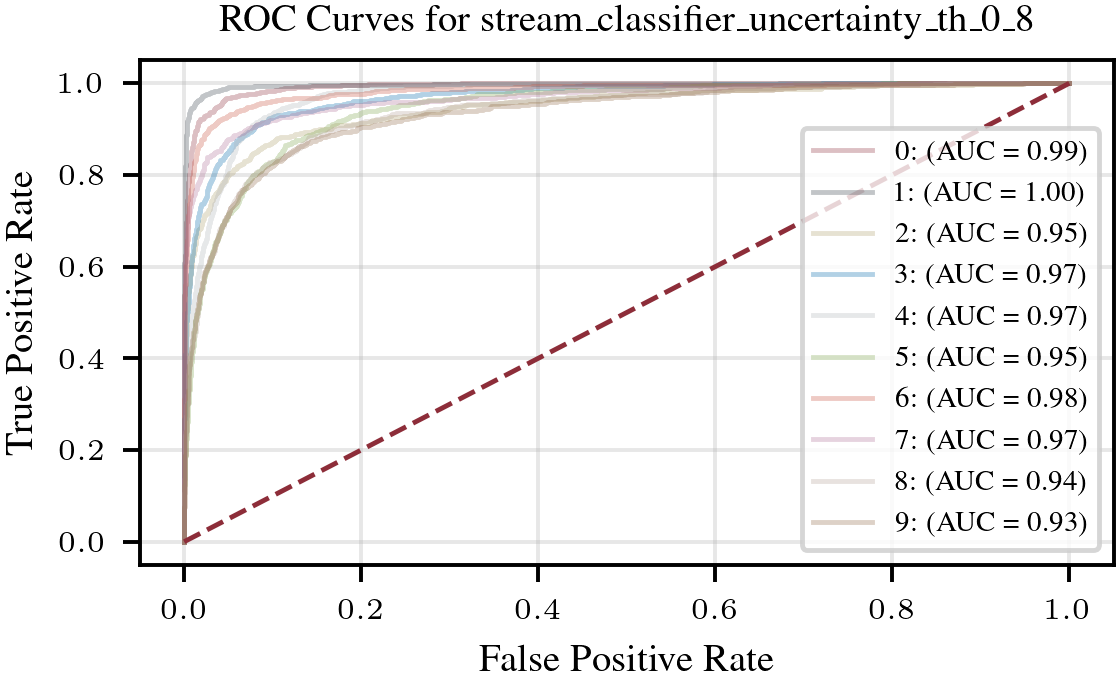

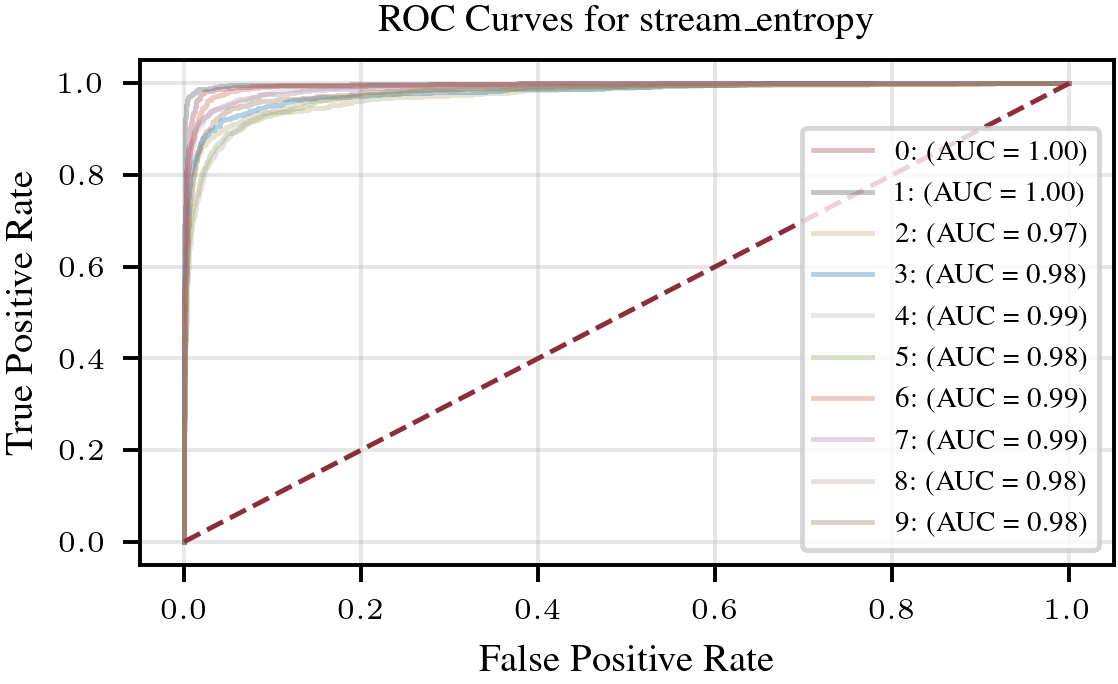

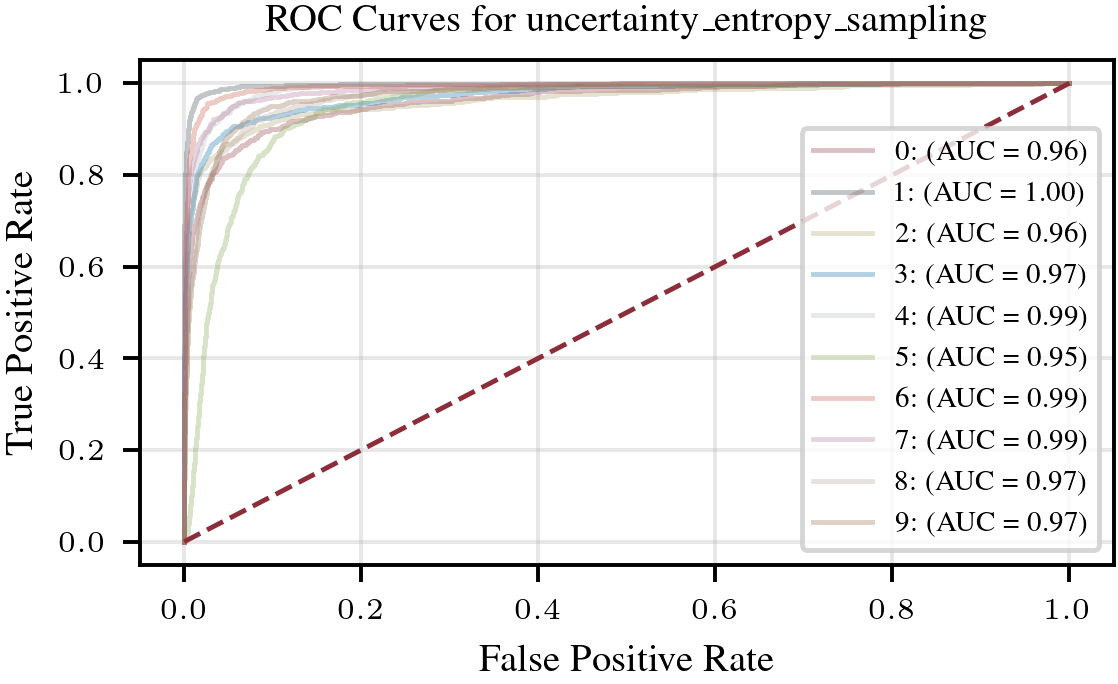

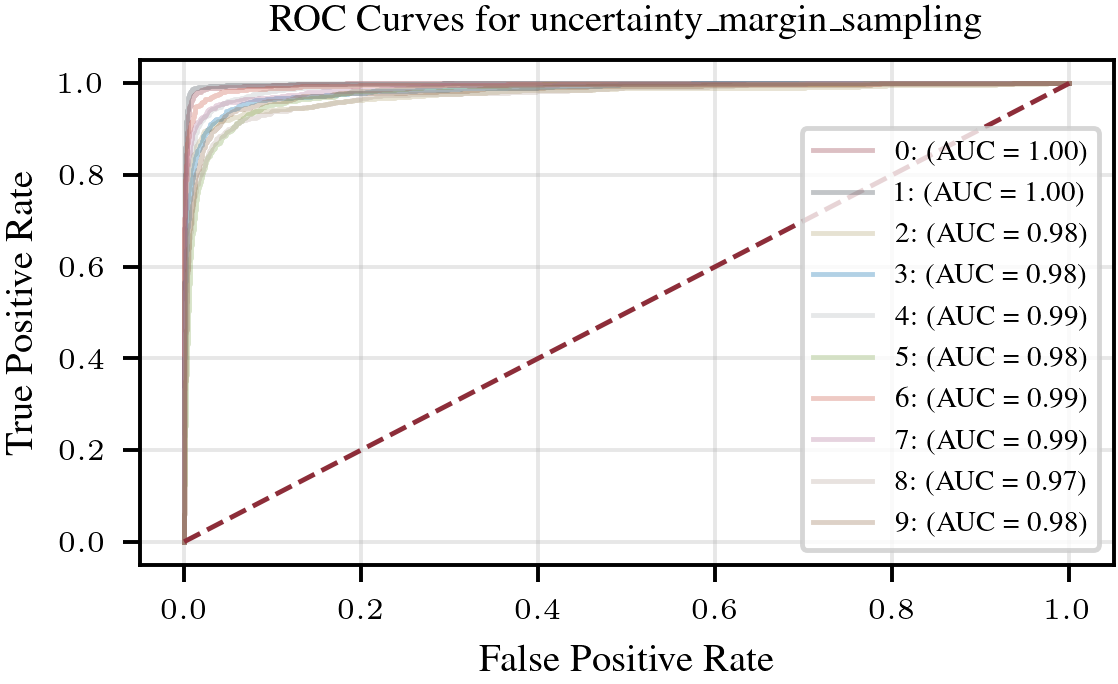

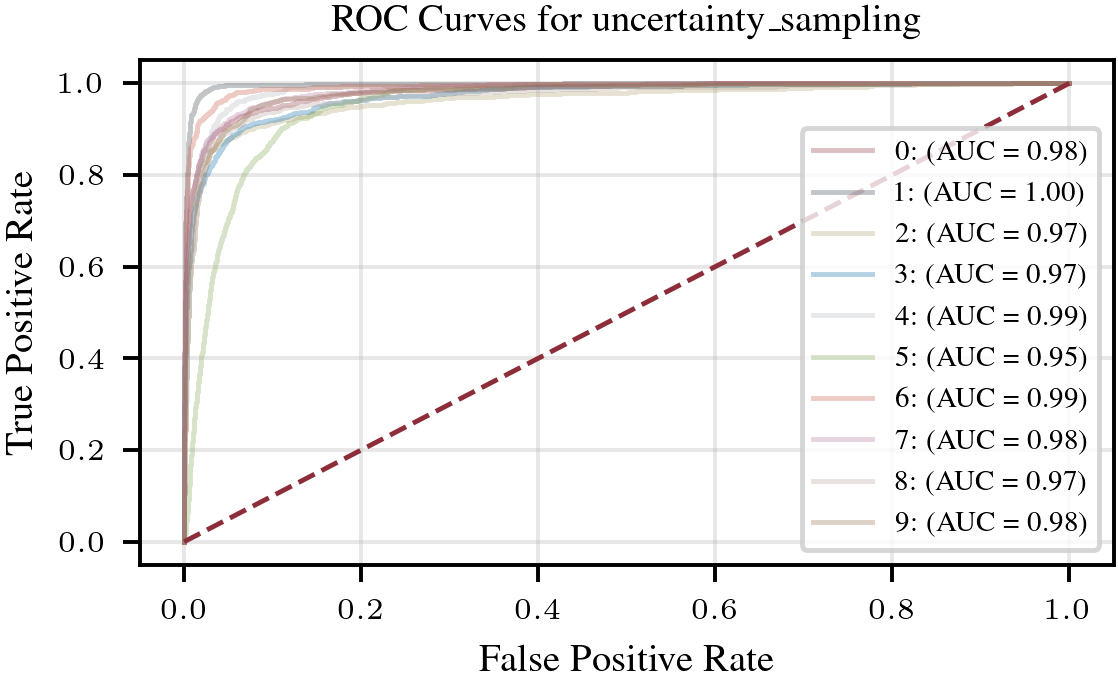

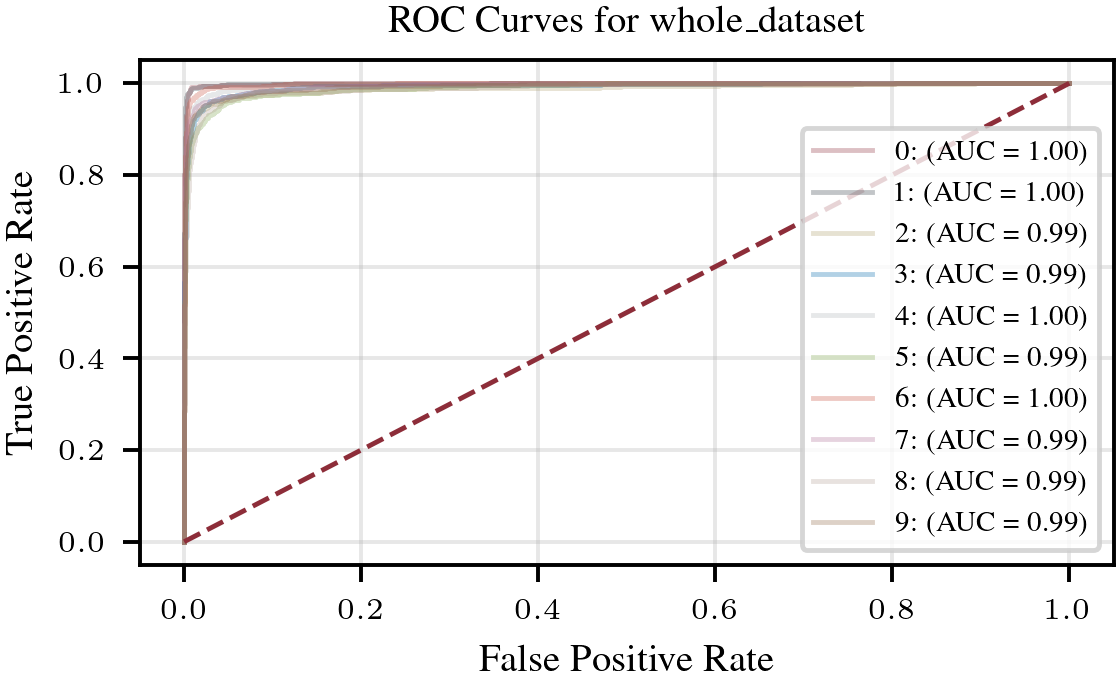

In [160]:
for query_method, _ in models_list.items():
    plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1))
    plt.rcParams.update({"figure.dpi": 350})
    plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
    
    y_hat_model = y_hats_probs[query_method]
    for c in classes:
        y_true_c = np.where(y_test == c, 1, 0)
        y_hat_c = y_hat_model[:, c]
        
        fpr, tpr, _ = roc_curve(y_true_c, y_hat_c)
        roc_auc = auc(fpr, tpr)
    
        plt.plot(fpr, tpr, label=f'{c}: (AUC = {roc_auc:.2f})', linewidth=line_width, alpha=0.3)
        
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=line_width)  # this is the diagonal baseline
    
    plt.title(f'ROC Curves for {query_method}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    
    plt.show()

## Confusion Matrix

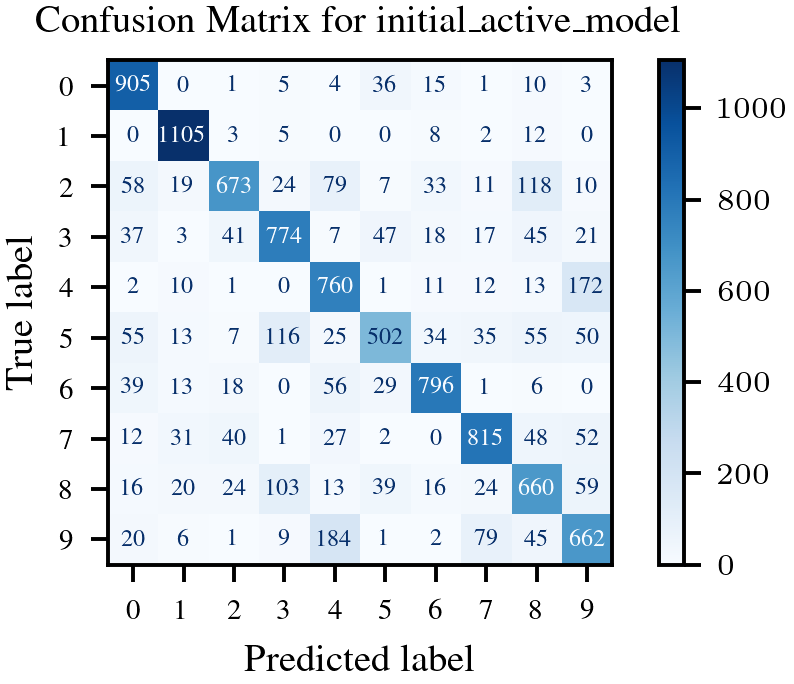

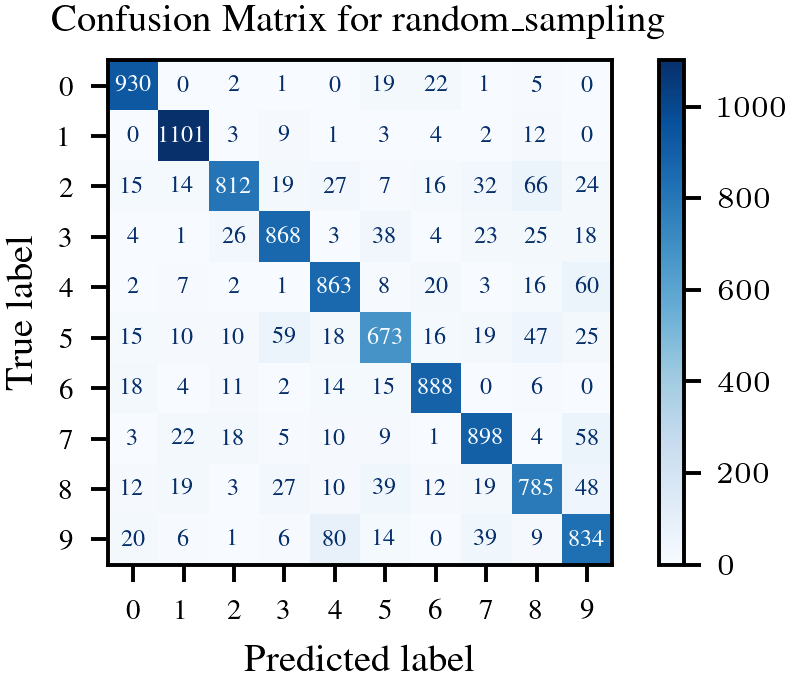

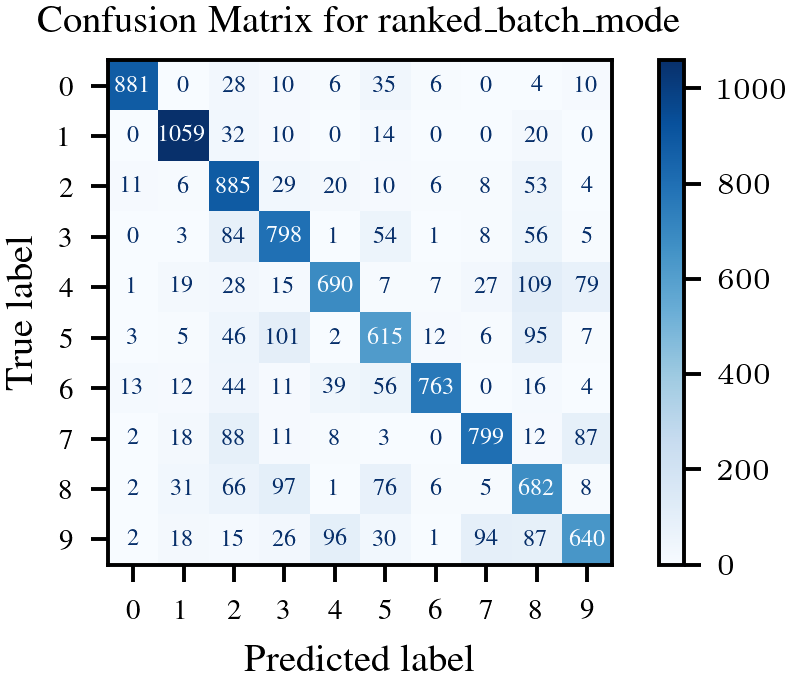

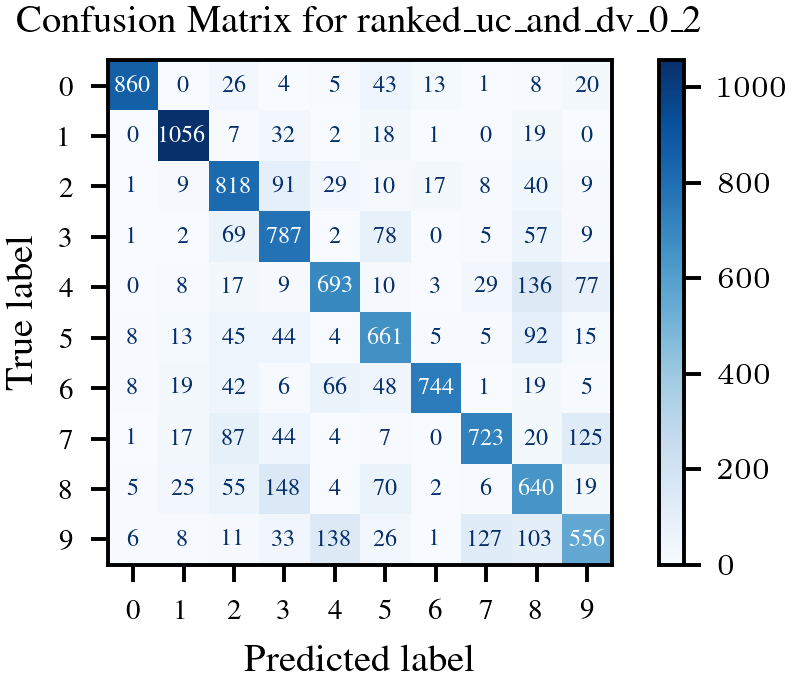

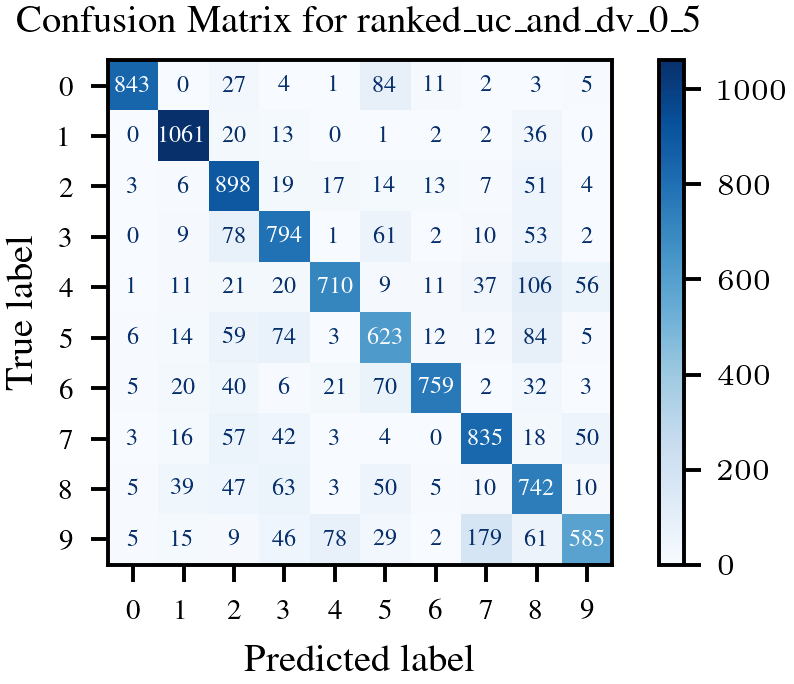

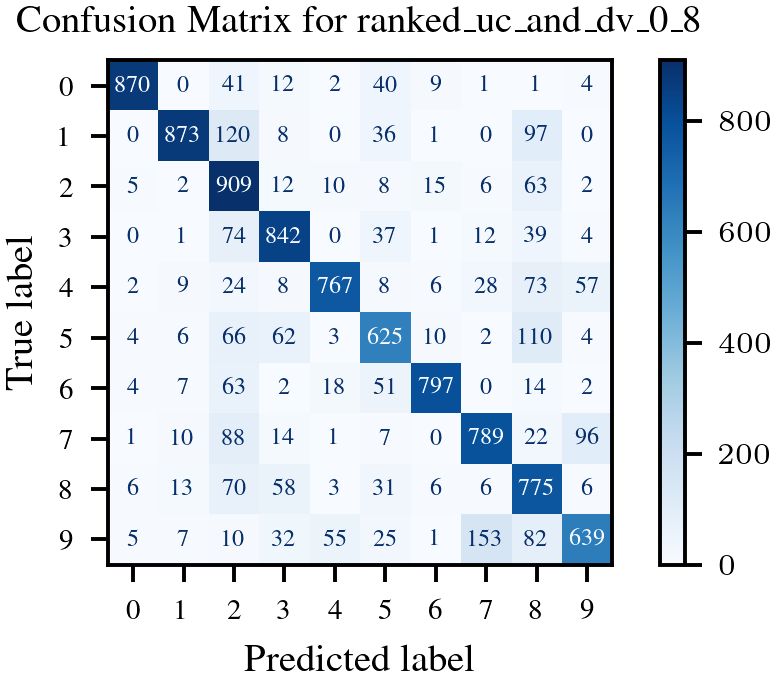

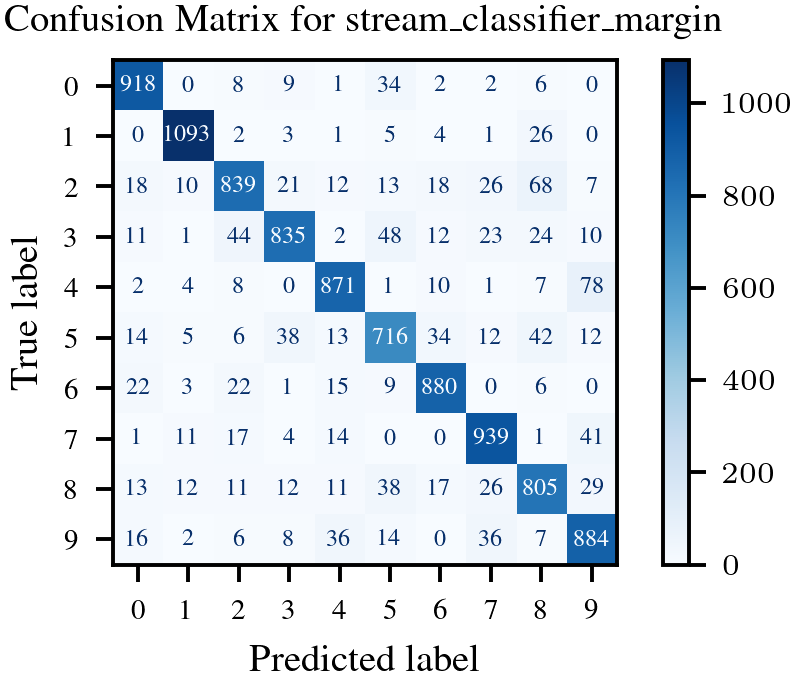

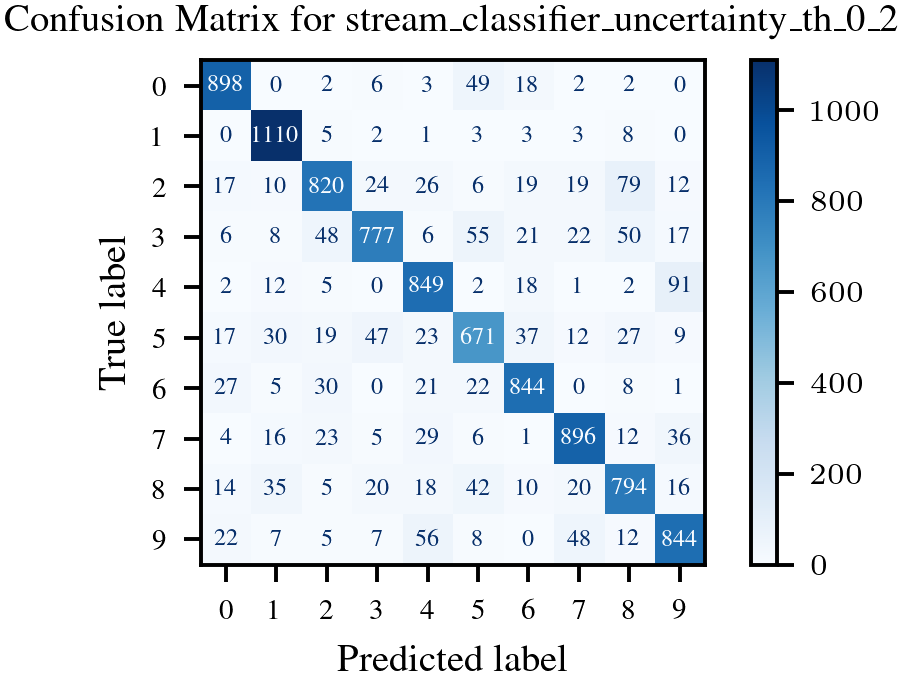

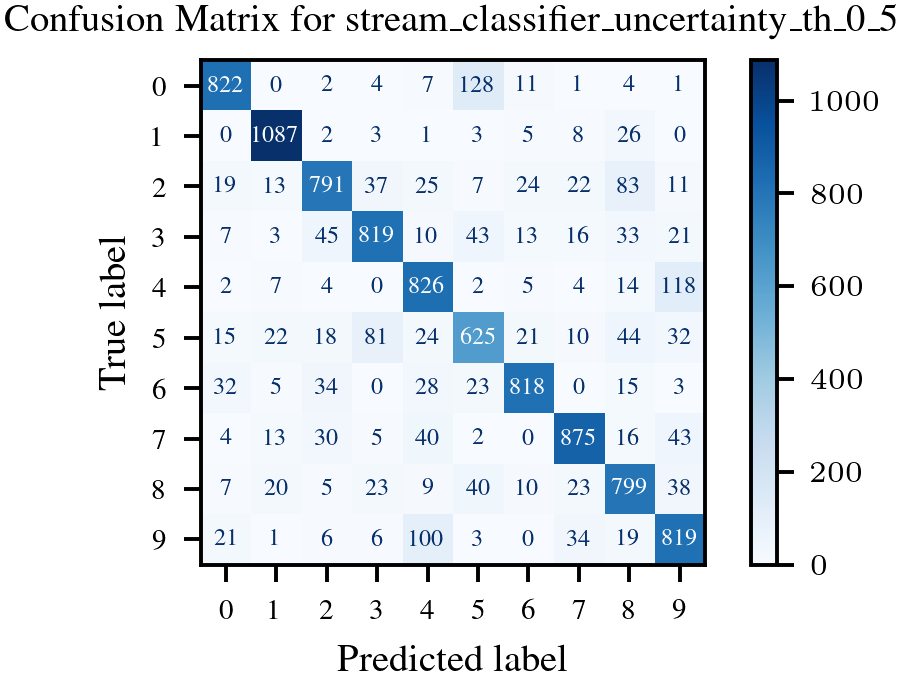

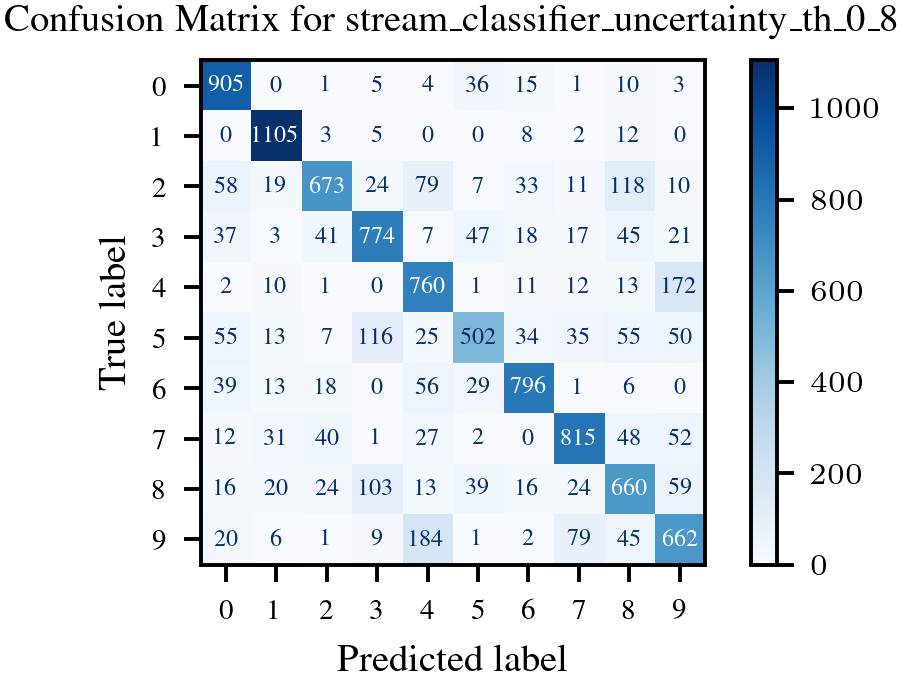

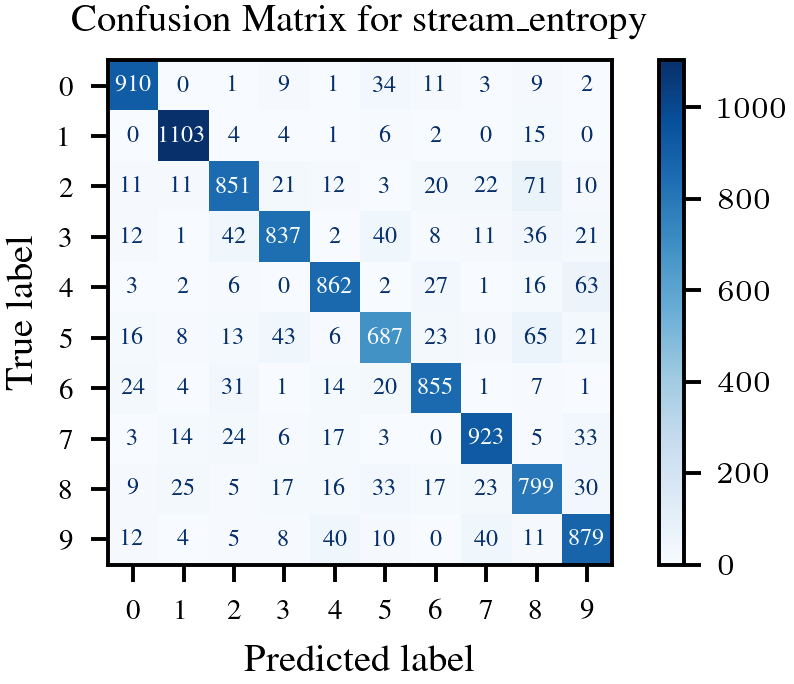

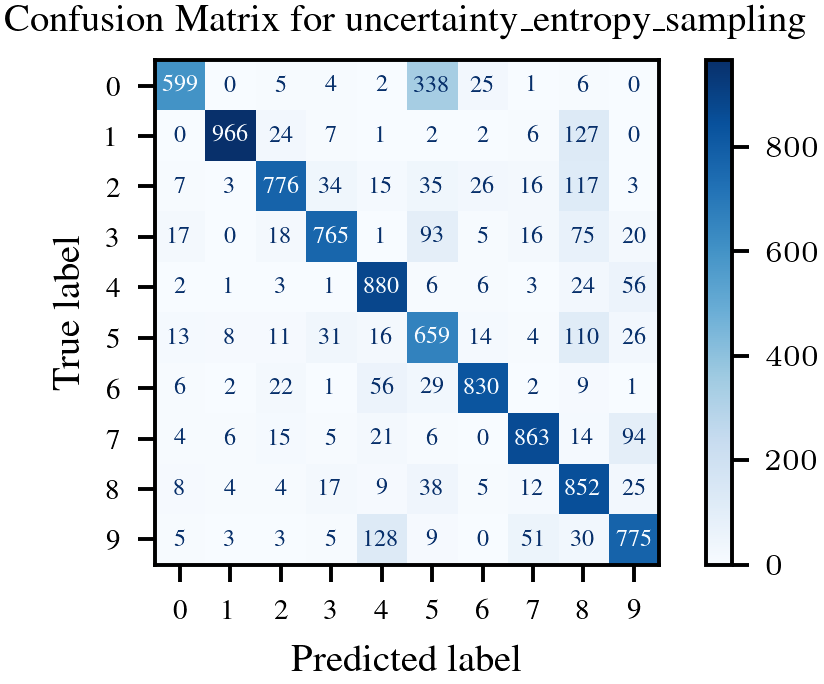

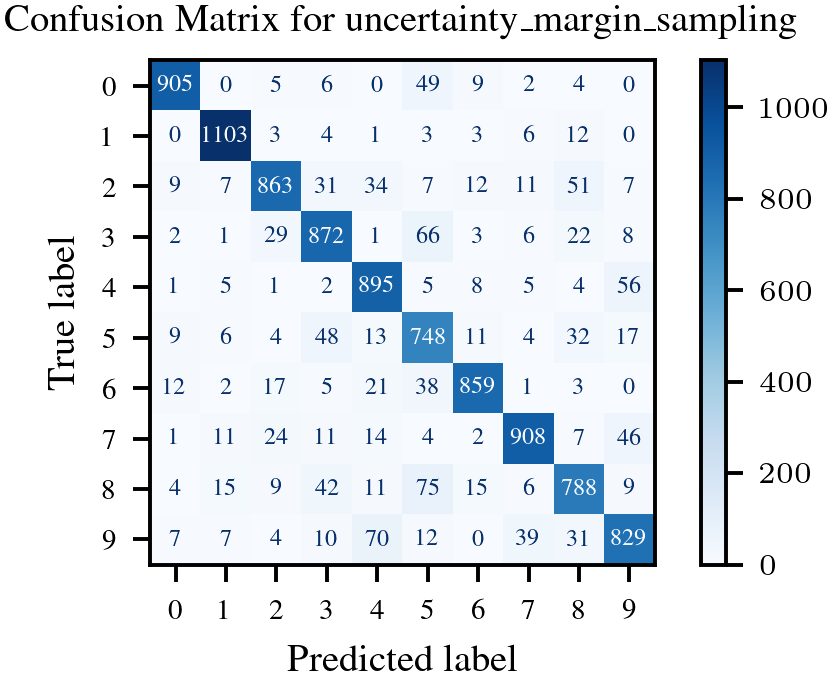

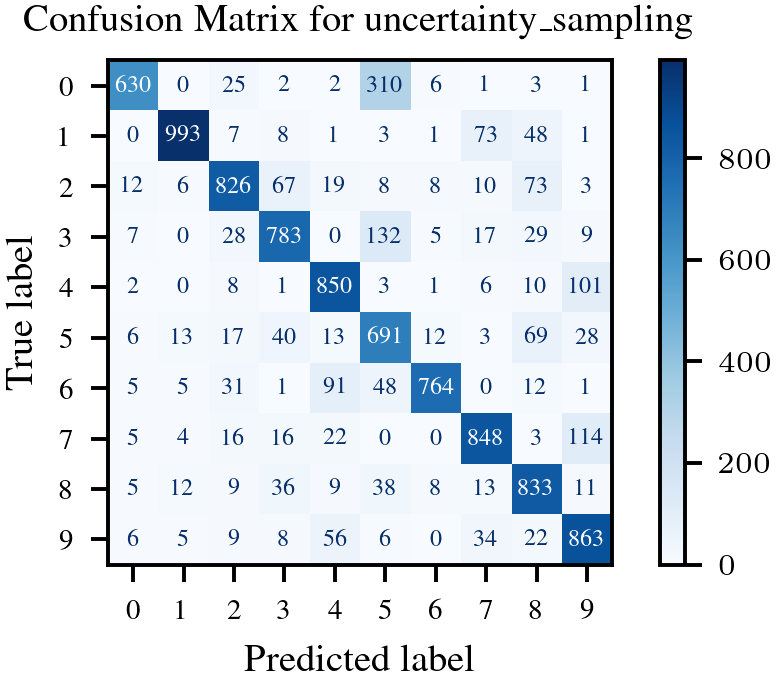

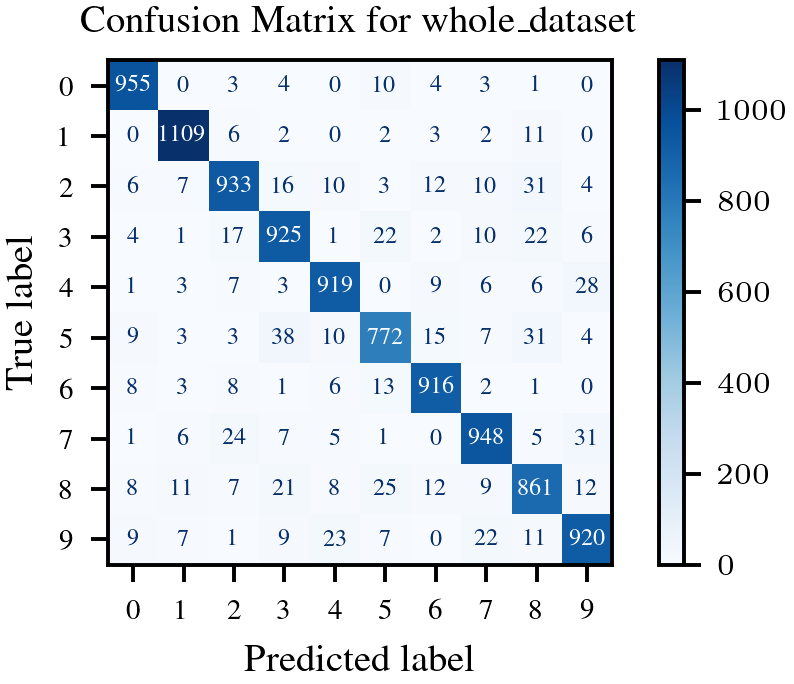

In [203]:
plt.rcParams.update({"figure.dpi": 350})
    
for query_method, y_hat_model in y_hats_classes.items():
    plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1))
    plt.rcParams.update({'font.size':5}) # manually set the font size inside the confusion matrix
    
    cm = confusion_matrix(y_test, y_hat_model)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap="Blues", xticks_rotation='horizontal', )
    
    plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1))
    plt.title(f'Confusion Matrix for {query_method}')
    
    plt.show()

## Precision, Recall, F1-Score

- Macro: Average accuracy equally across all classes. --> Metric is for each class independently
- Micro: Account for class imbalance by aggregating globally. --> Imbalance-aware
- Weighted Average: Weights class metrics by number of true samples in each classes support. Classes with more samples have larger influence.

In [208]:
for query_method, y_preds in y_hats_classes.items():
    print(f"{query_method}: \n"
          f"{classification_report(y_test, y_preds, target_names=[str(c) for c in classes])}")

initial_active_model: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       980
           1       0.91      0.97      0.94      1135
           2       0.83      0.65      0.73      1032
           3       0.75      0.77      0.76      1010
           4       0.66      0.77      0.71       982
           5       0.76      0.56      0.65       892
           6       0.85      0.83      0.84       958
           7       0.82      0.79      0.80      1028
           8       0.65      0.68      0.66       974
           9       0.64      0.66      0.65      1009

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.77      0.76     10000

random_sampling: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       980
           1       0.93      0.97      0.95      1135
           2       0.91      0.79    